# MUSIC RECOMMDATION SYSTEM

## Import Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score, classification_report

## Data Loading

In [24]:
# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows of the dataset
df.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

## Data Cleaning

In [25]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Convert 'artists' column from string to list
df['artists'] = df['artists'].apply(lambda x: eval(x))

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64


## Show Data

In [11]:
# Display summary statistics of the dataset
df.describe()

valence           year   acousticness   danceability  \
count  170653.000000  170653.000000  170653.000000  170653.000000   
mean        0.528587    1976.787241       0.502115       0.537396   
std         0.263171      25.917853       0.376032       0.176138   
min         0.000000    1921.000000       0.000000       0.000000   
25%         0.317000    1956.000000       0.102000       0.415000   
50%         0.540000    1977.000000       0.516000       0.548000   
75%         0.747000    1999.000000       0.893000       0.668000   
max         1.000000    2020.000000       0.996000       0.988000   

        duration_ms         energy       explicit  instrumentalness  \
count  1.706530e+05  170653.000000  170653.000000     170653.000000   
mean   2.309483e+05       0.482389       0.084575          0.167010   
std    1.261184e+05       0.267646       0.278249          0.313475   
min    5.108000e+03       0.000000       0.000000          0.000000   
25%    1.698270e+05       0.255000       0.000000          0.000000   
50%    2.074670e+05       0.471000       0.000000          0.000216   
75%    2.624000e+05       0.703000       0.000000          0.102000   
max    5.403500e+06       1.000000       1.000000          1.000000   

                 key       liveness       loudness           mode  \
count  170653.000000  170653.000000  170653.000000  170653.000000   
mean        5.199844       0.205839     -11.467990       0.706902   
std         3.515094       0.174805       5.697943       0.455184   
min         0.000000       0.000000     -60.000000       0.000000   
25%         2.000000       0.098800     -14.615000       0.000000   
50%         5.000000       0.136000     -10.580000       1.000000   
75%         8.000000       0.261000      -7.183000       1.000000   
max        11.000000       1.000000       3.855000       1.000000   

          popularity    speechiness          tempo  
count  170653.000000  170653.000000  170653.000000  
mean       31.431794       0.098393     116.861590  
std        21.826615       0.162740      30.708533  
min         0.000000       0.000000       0.000000  
25%        11.000000       0.034900      93.421000  
50%        33.000000       0.045000     114.729000  
75%        48.000000       0.075600     135.537000  
max       100.000000       0.970000     243.507000

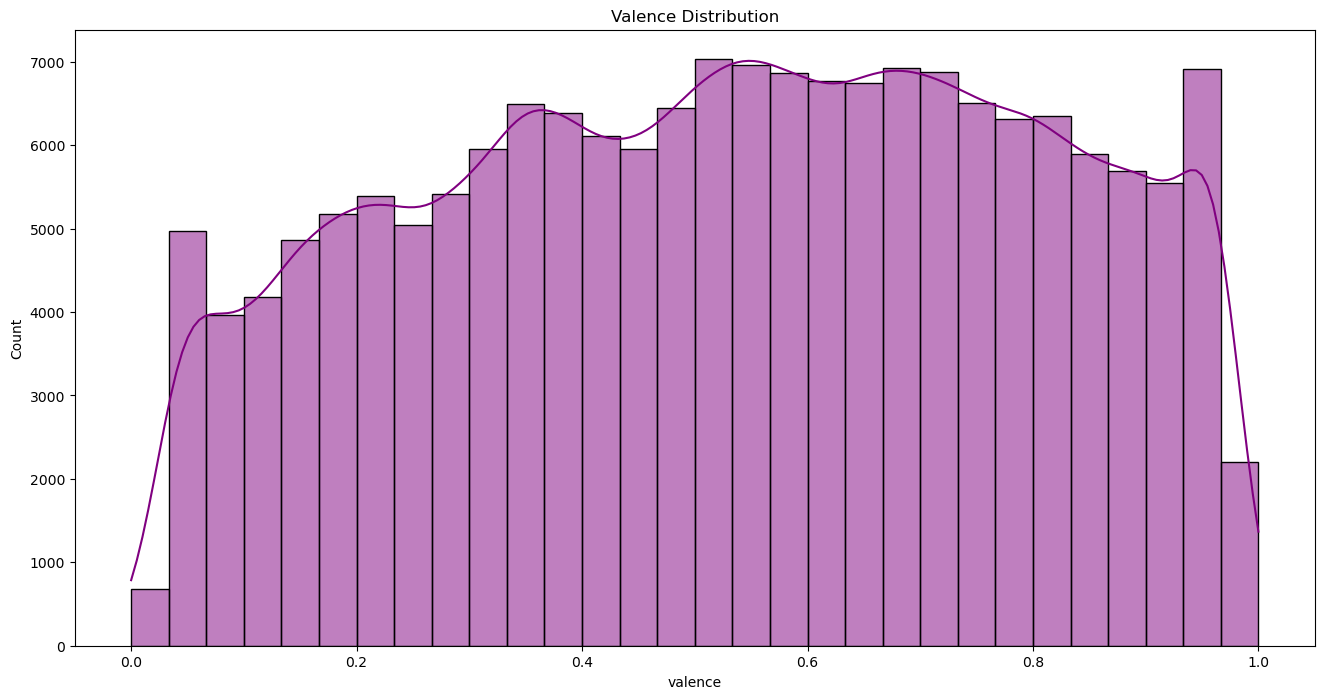

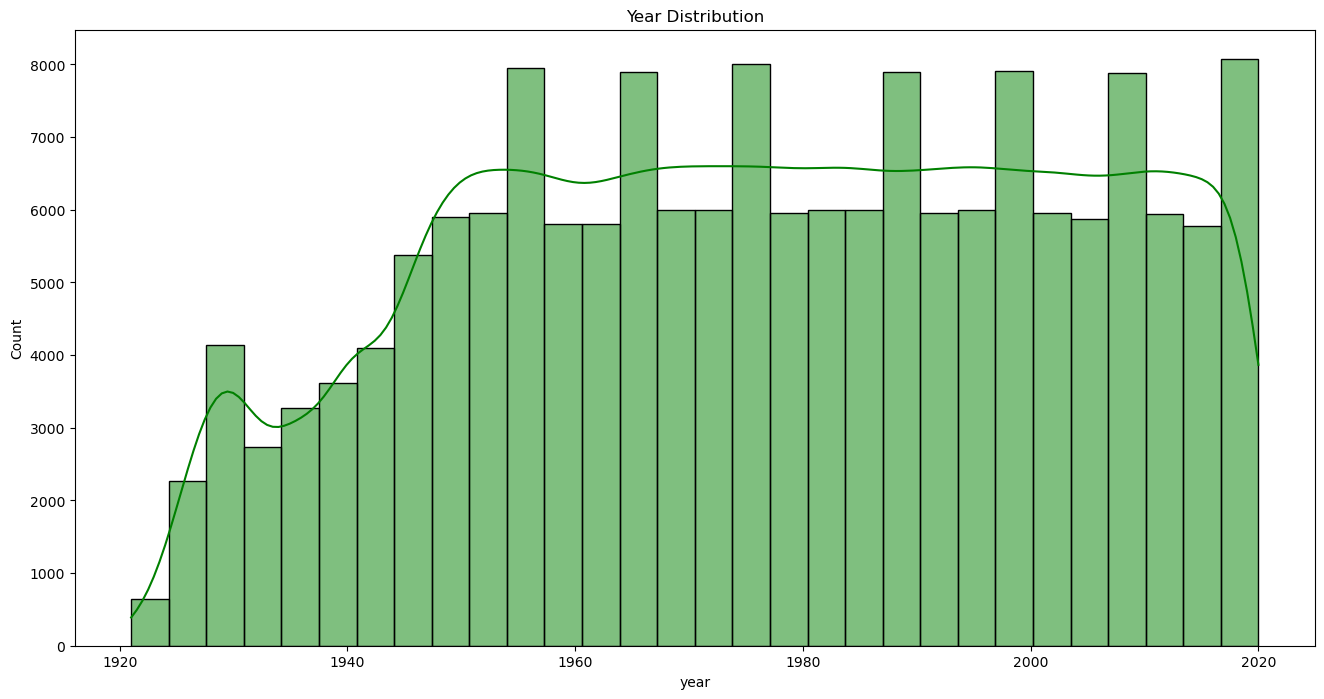

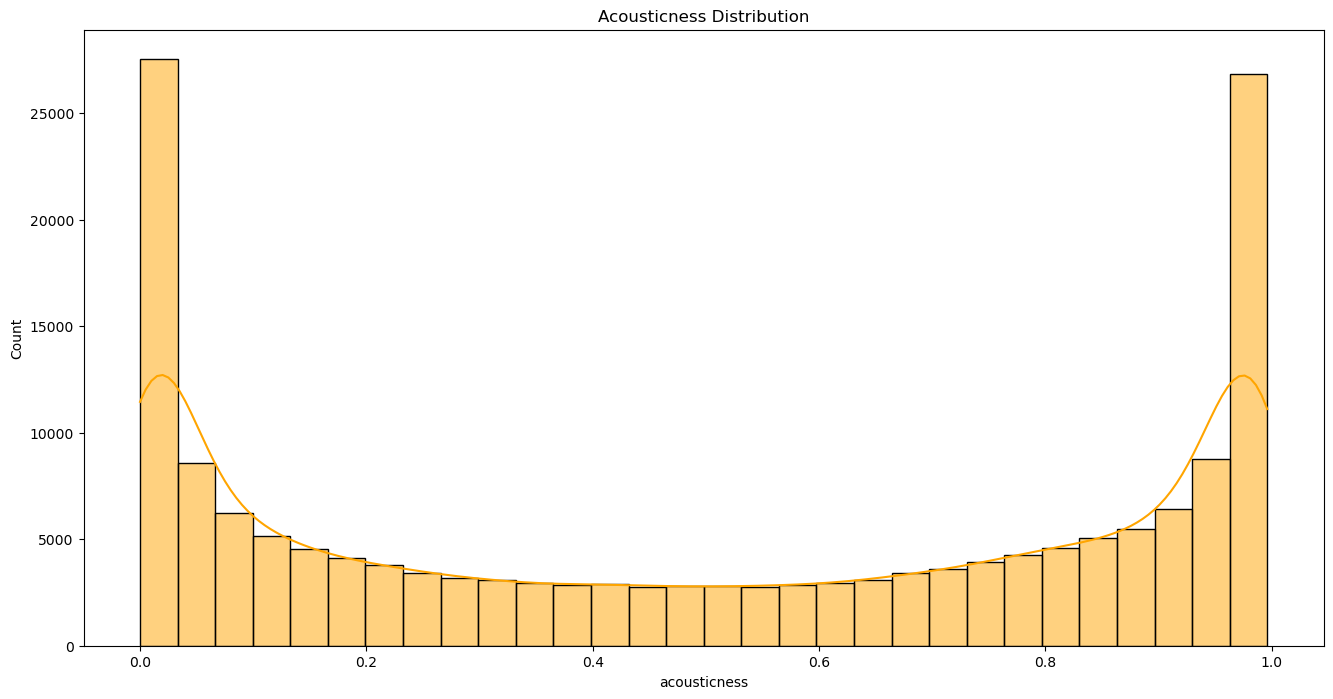

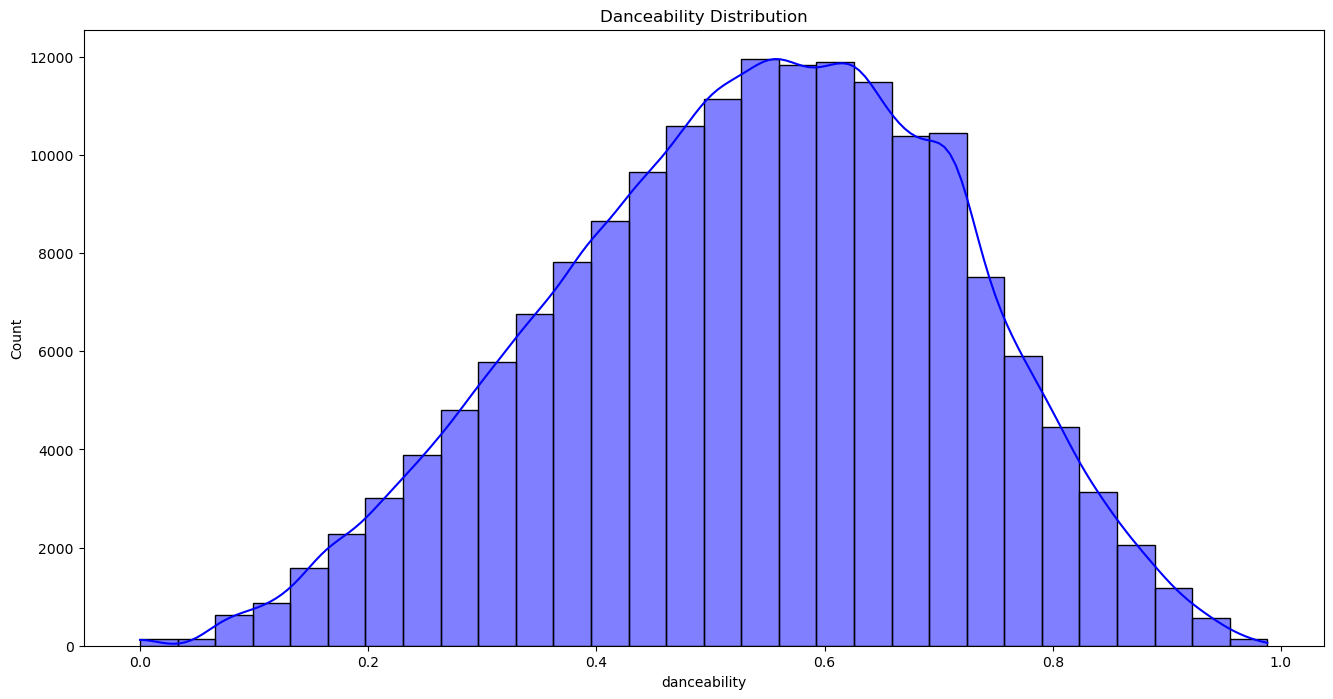

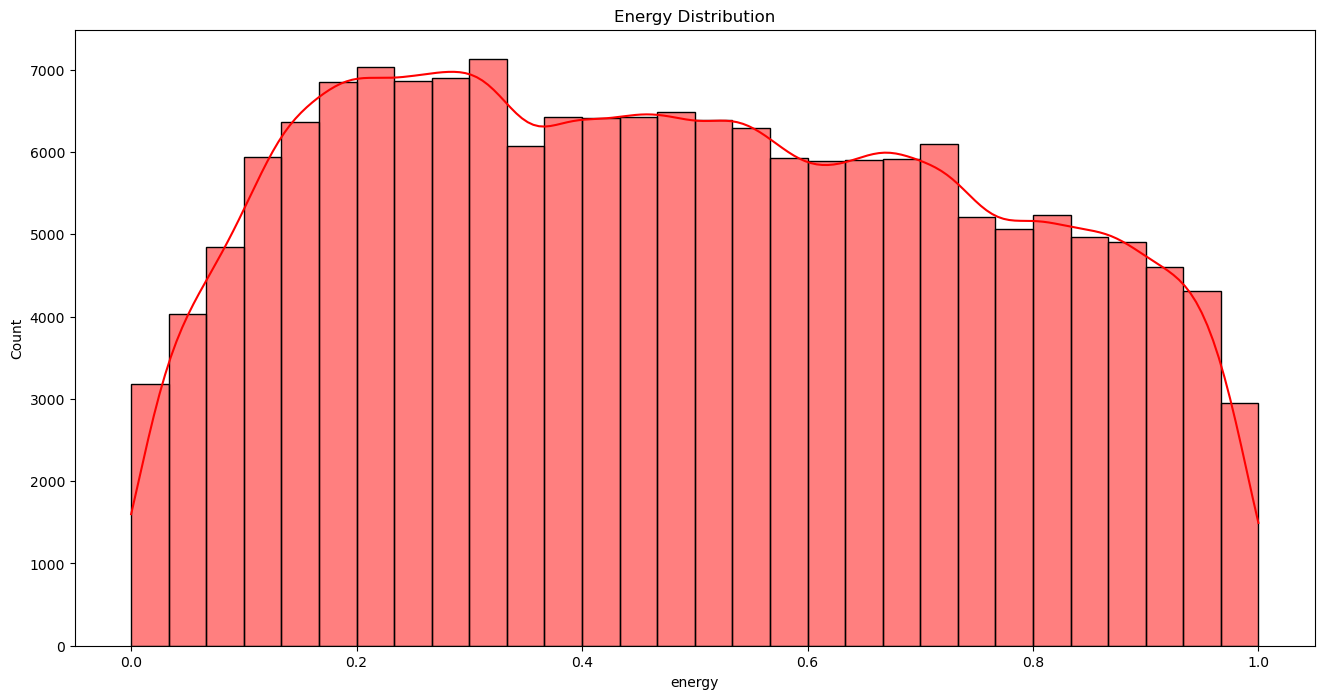

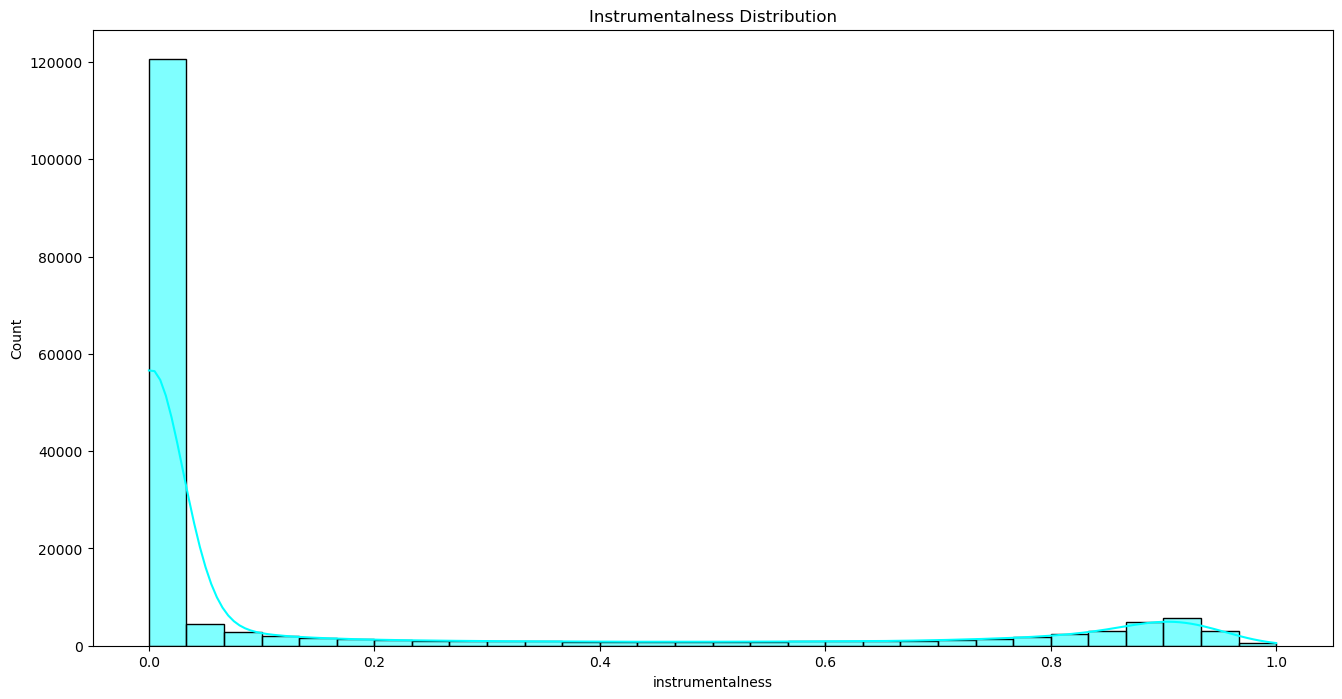

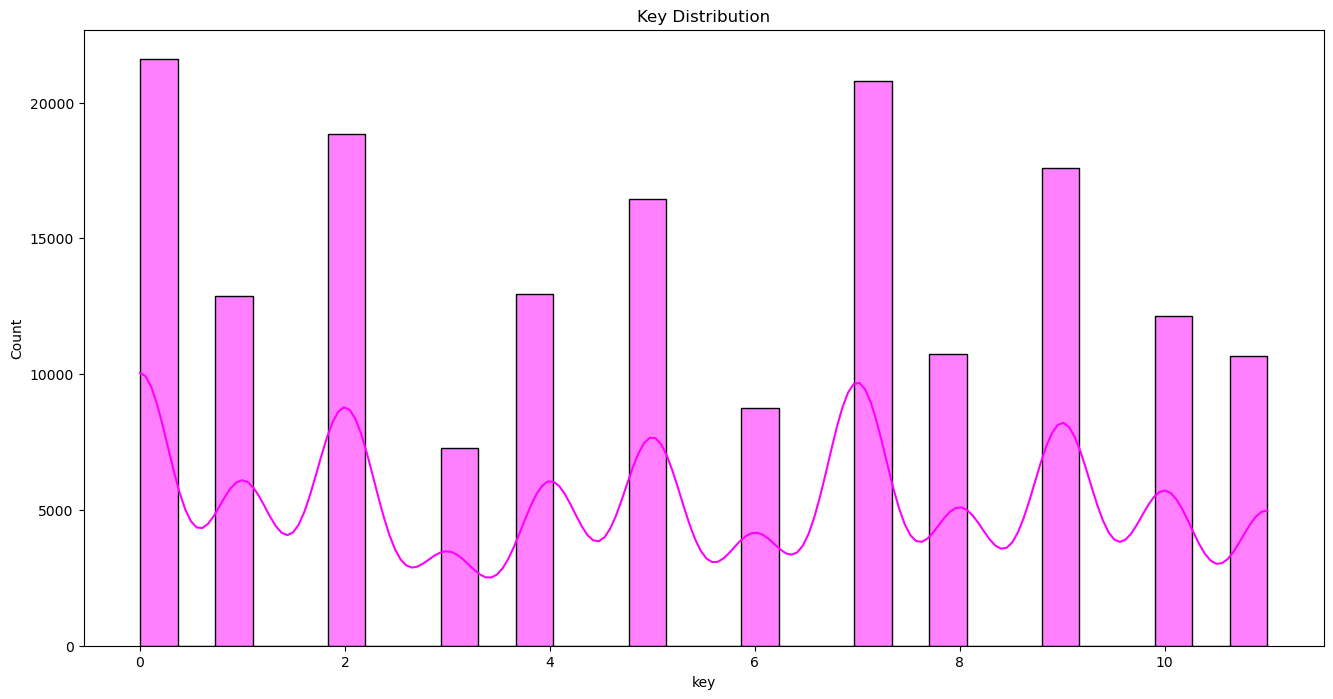

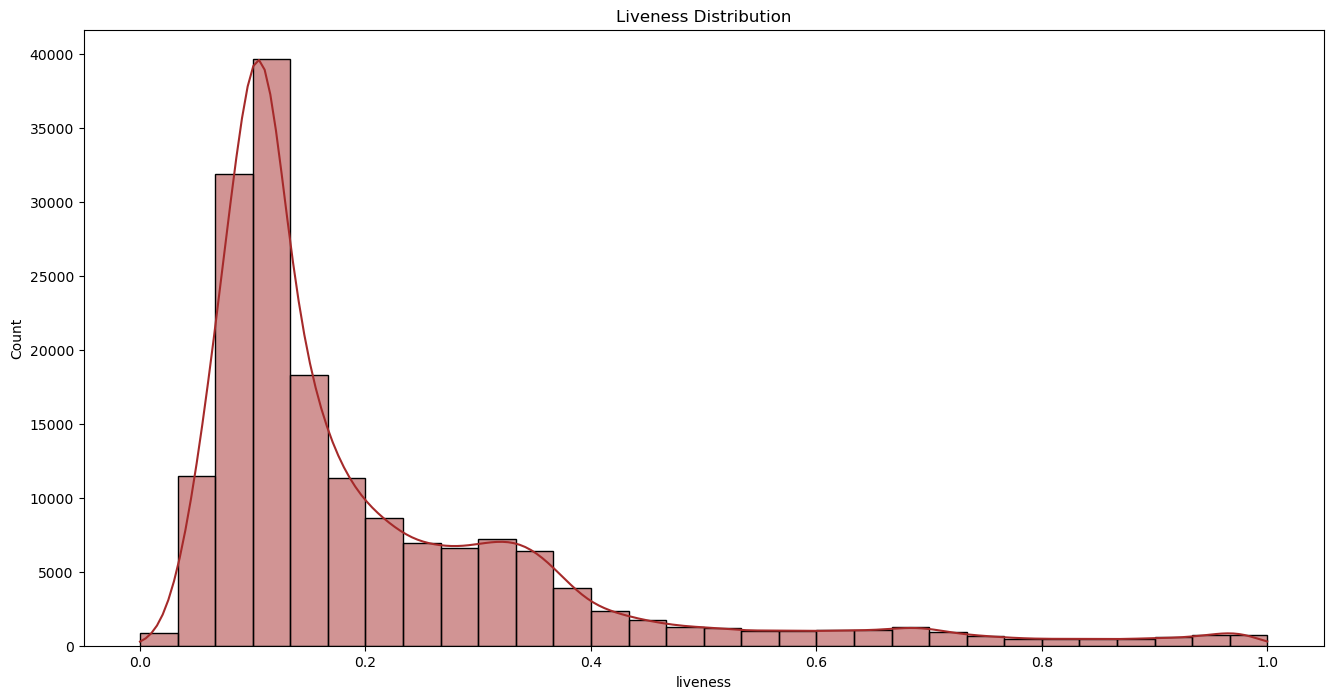

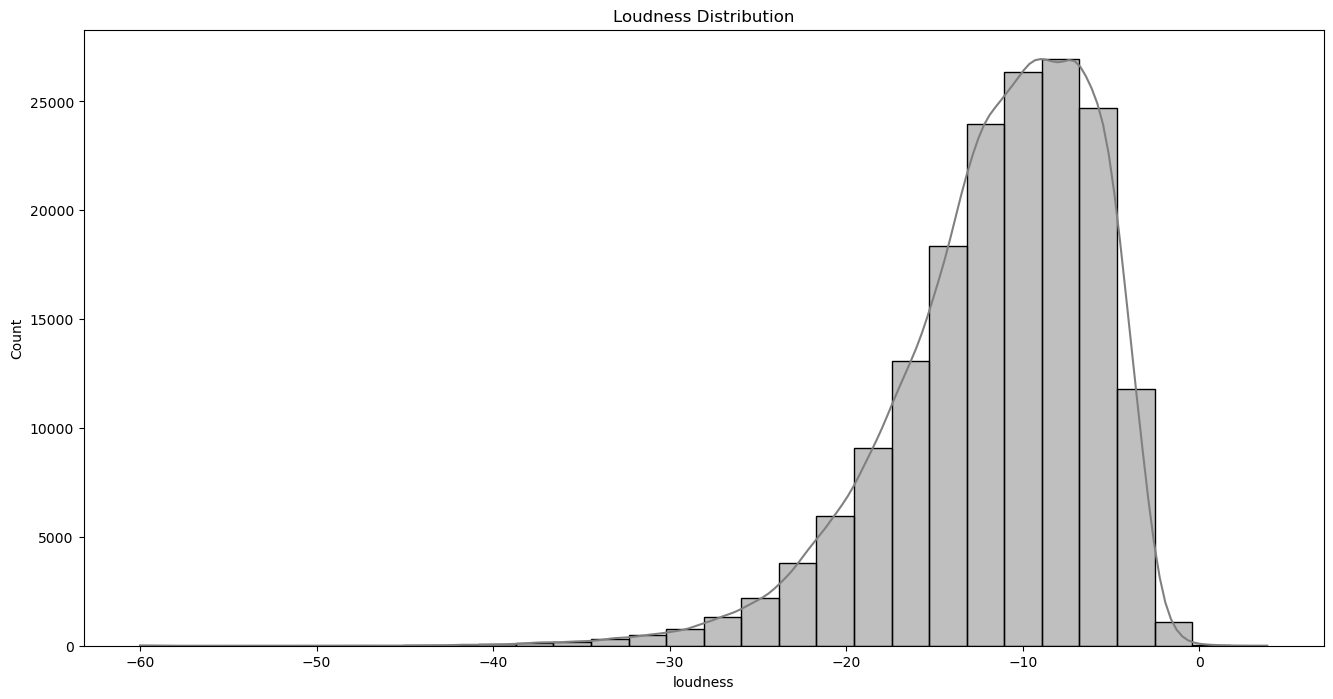

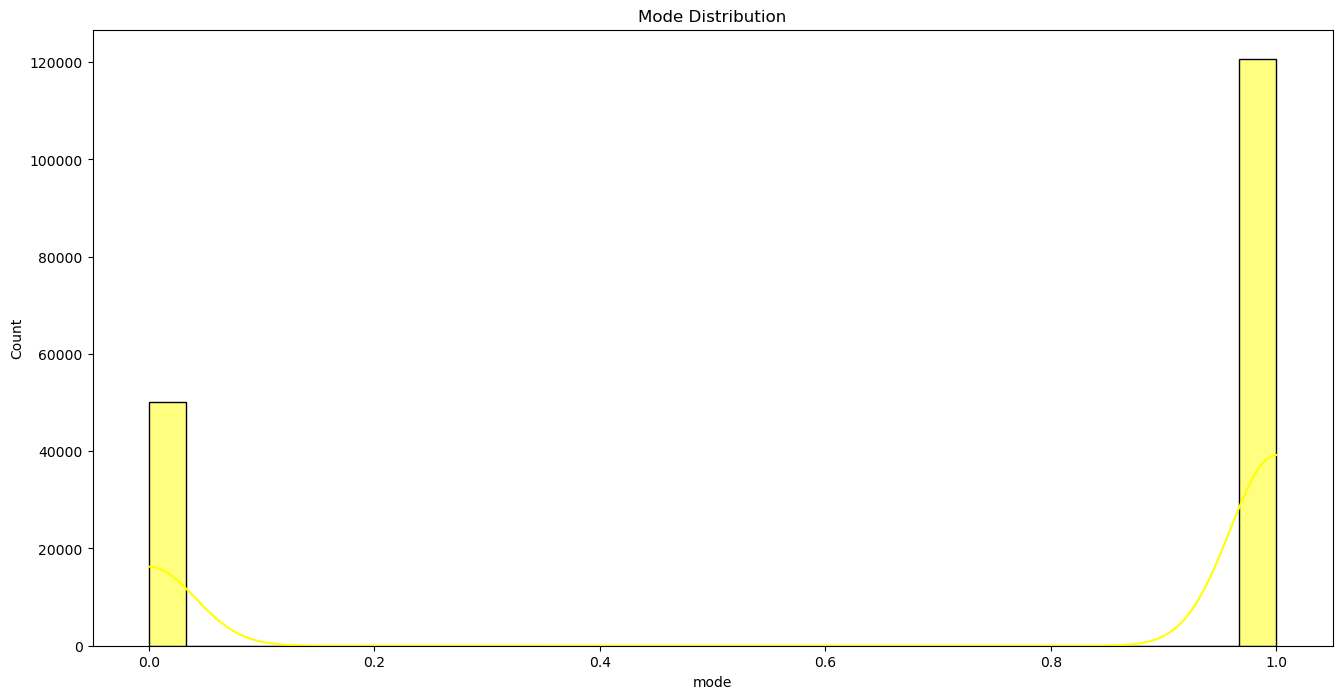

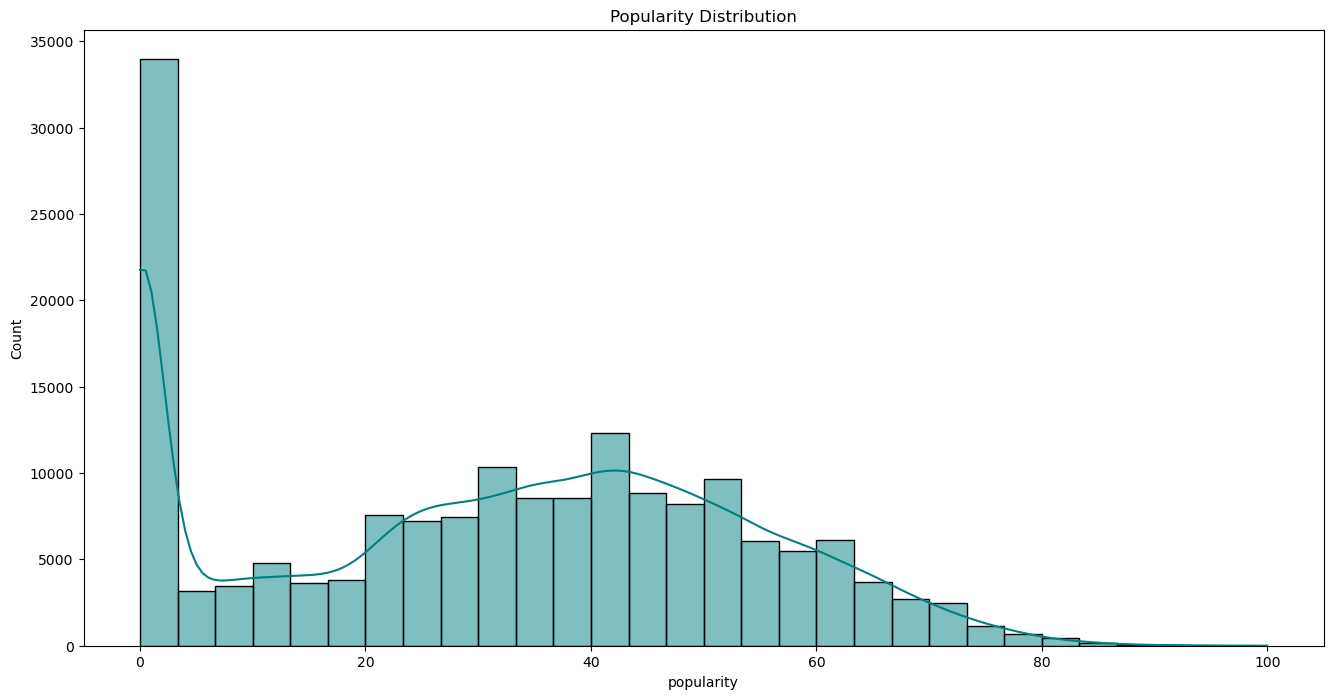

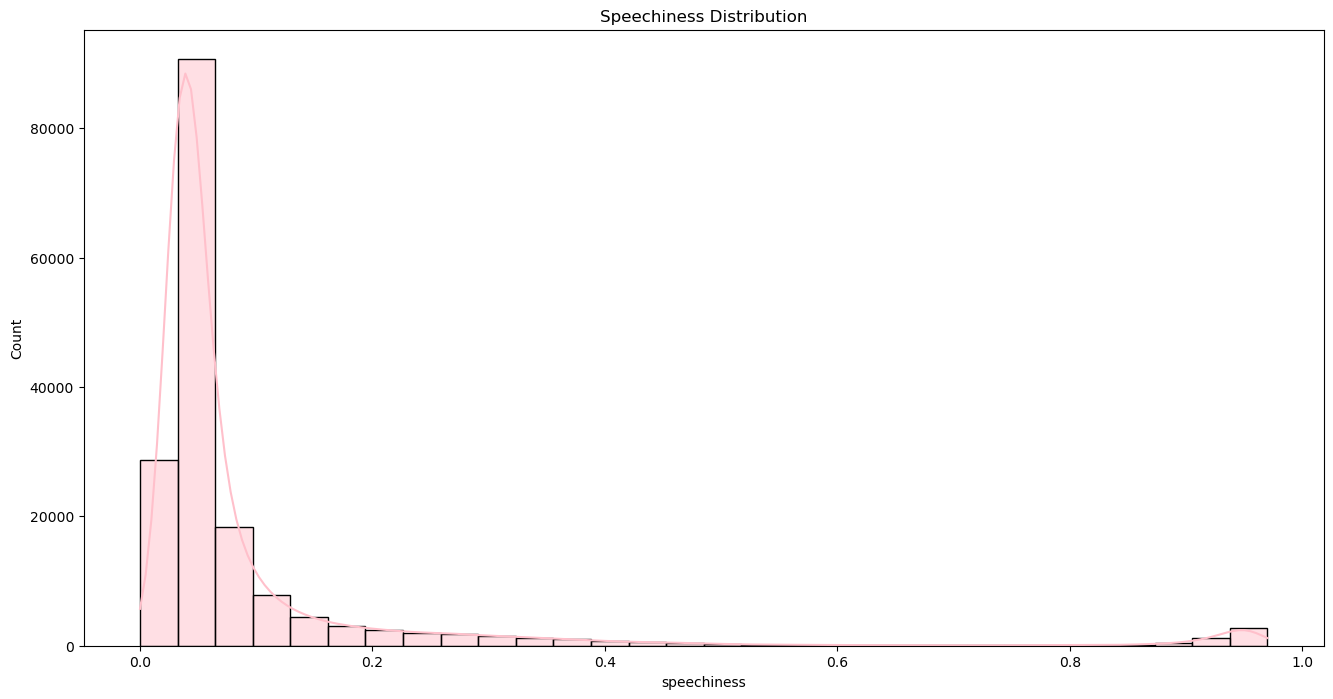

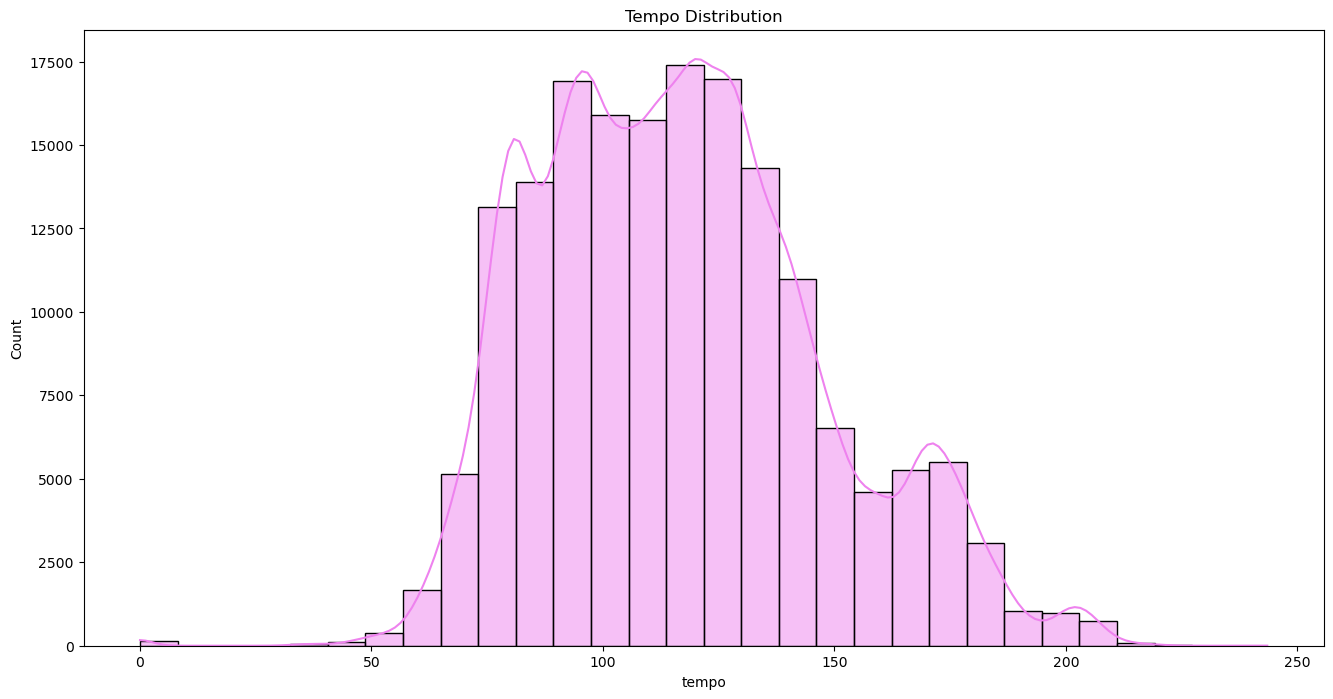

In [40]:
# Plot distributions of various features
plt.figure(figsize=(16, 8))
sns.histplot(df['valence'], kde=True, bins=30, color='purple')
plt.title('Valence Distribution')
plt.show()

plt.figure(figsize=(16, 8))
sns.histplot(df['year'], kde=True, bins=30, color='green')
plt.title('Year Distribution')
plt.show()

plt.figure(figsize=(16, 8))
sns.histplot(df['acousticness'], kde=True, bins=30, color='orange')
plt.title('Acousticness Distribution')
plt.show()

plt.figure(figsize=(16, 8))
sns.histplot(df['danceability'], kde=True, bins=30, color='blue')
plt.title('Danceability Distribution')
plt.show()

plt.figure(figsize=(16, 8))
sns.histplot(df['energy'], kde=True, bins=30, color='red')
plt.title('Energy Distribution')
plt.show()

plt.figure(figsize=(16, 8))
sns.histplot(df['instrumentalness'], kde=True, bins=30, color='cyan')
plt.title('Instrumentalness Distribution')
plt.show()

plt.figure(figsize=(16, 8))
sns.histplot(df['key'], kde=True, bins=30, color='magenta')
plt.title('Key Distribution')
plt.show()

plt.figure(figsize=(16, 8))
sns.histplot(df['liveness'], kde=True, bins=30, color='brown')
plt.title('Liveness Distribution')
plt.show()

plt.figure(figsize=(16, 8))
sns.histplot(df['loudness'], kde=True, bins=30, color='grey')
plt.title('Loudness Distribution')
plt.show()

plt.figure(figsize=(16, 8))
sns.histplot(df['mode'], kde=True, bins=30, color='yellow')
plt.title('Mode Distribution')
plt.show()

plt.figure(figsize=(16, 8))
sns.histplot(df['popularity'], kde=True, bins=30, color='teal')
plt.title('Popularity Distribution')
plt.show()

plt.figure(figsize=(16, 8))
sns.histplot(df['speechiness'], kde=True, bins=30, color='pink')
plt.title('Speechiness Distribution')
plt.show()

plt.figure(figsize=(16, 8))
sns.histplot(df['tempo'], kde=True, bins=30, color='violet')
plt.title('Tempo Distribution')
plt.show()

C:\Users\muham\AppData\Local\Temp\ipykernel_7404\113451612.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


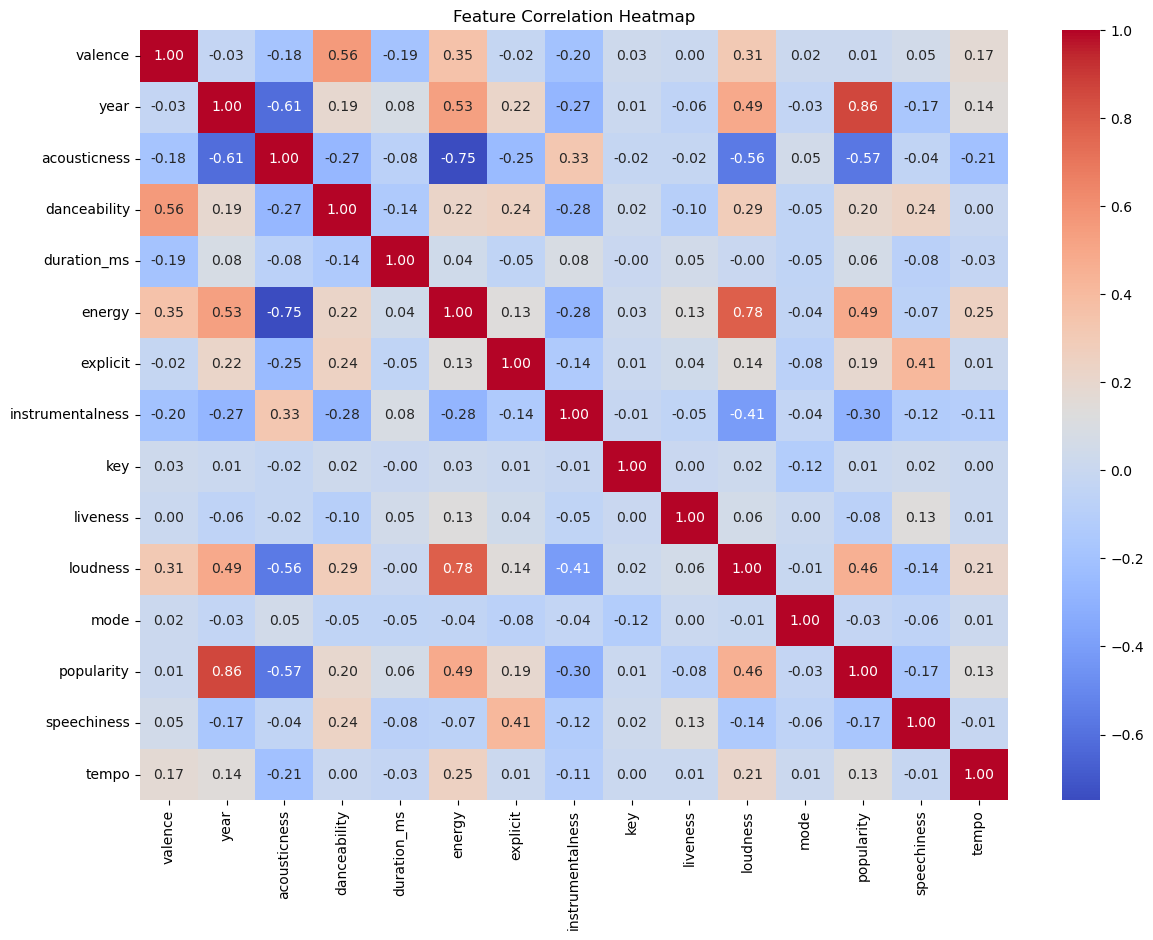

In [42]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

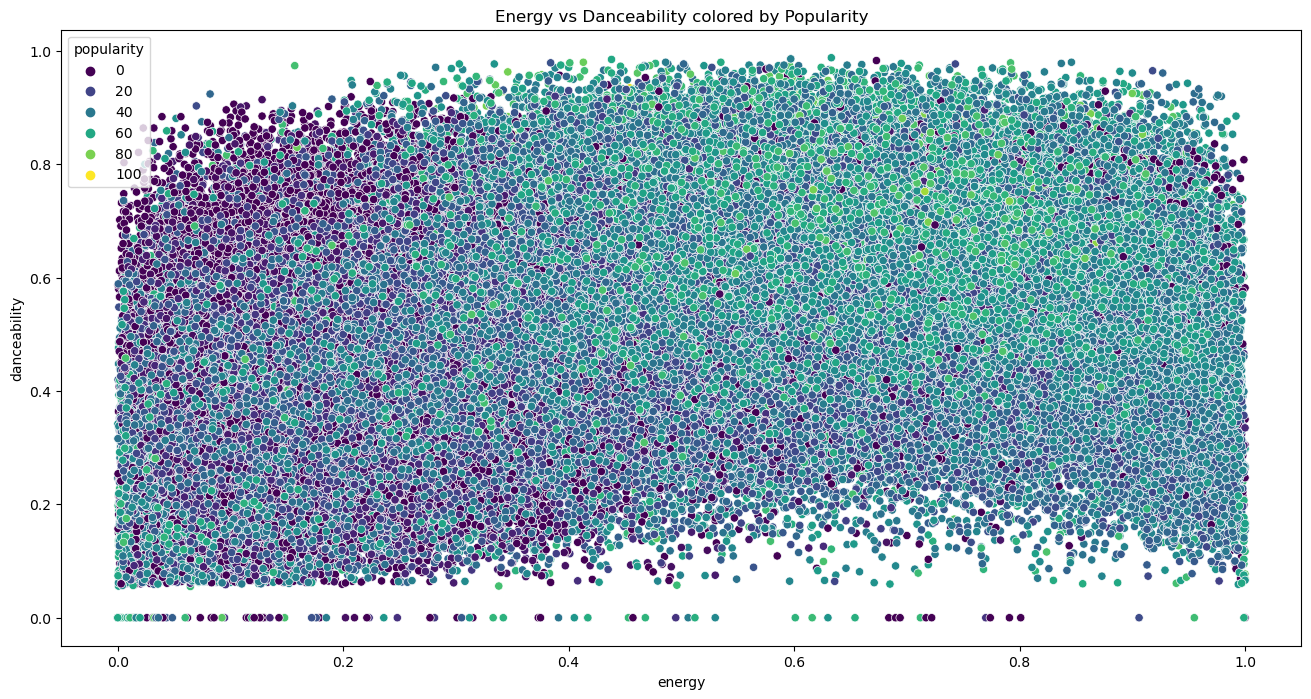

In [43]:
# Plotting energy vs. danceability, colored by popularity
plt.figure(figsize=(16, 8))
sns.scatterplot(x='energy', y='danceability', hue='popularity', data=df, palette='viridis')
plt.title('Energy vs Danceability colored by Popularity')
plt.show()

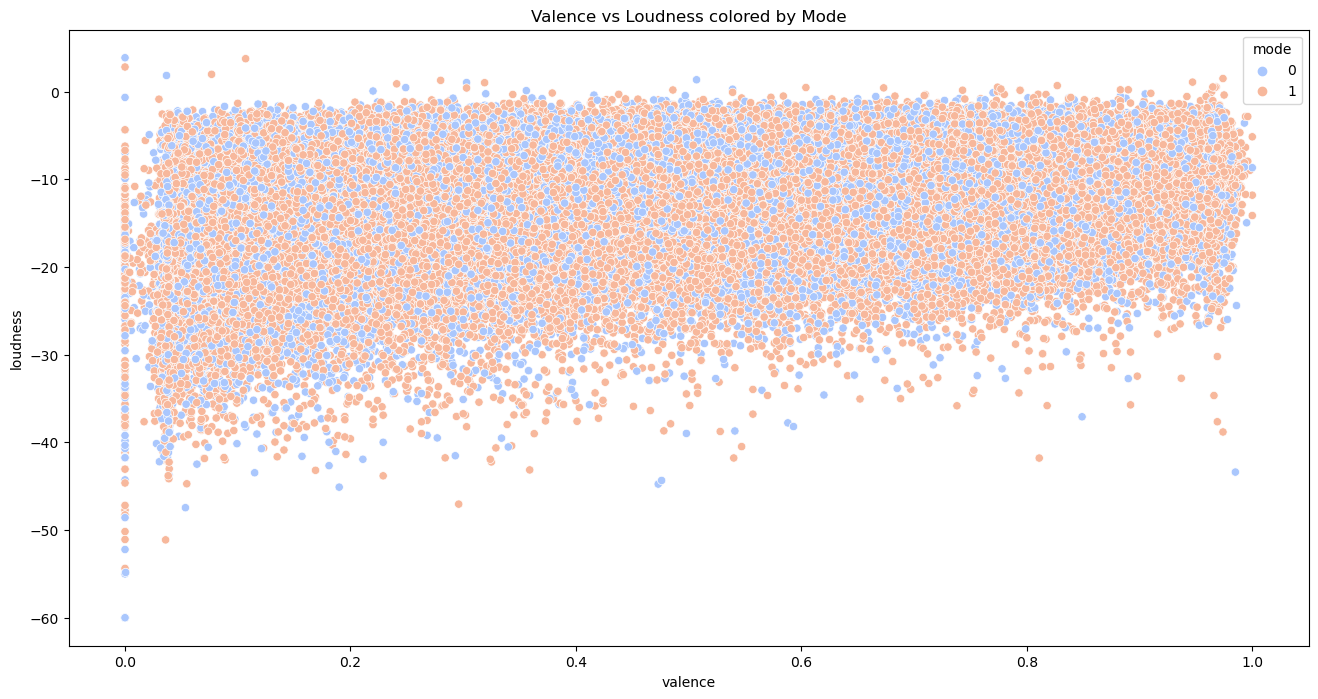

In [44]:
# Plotting valence vs. loudness, colored by mode
plt.figure(figsize=(16, 8))
sns.scatterplot(x='valence', y='loudness', hue='mode', data=df, palette='coolwarm')
plt.title('Valence vs Loudness colored by Mode')
plt.show()

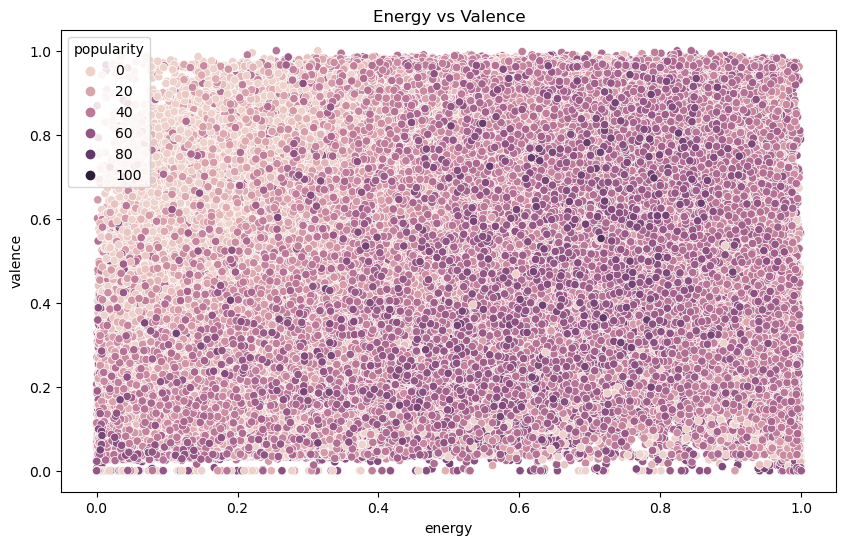

In [45]:
# Plotting energy vs. valence, colored by popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='valence', hue='popularity', data=df)
plt.title('Energy vs Valence')
plt.show()

## Encoding, Scaling, and Splitting Data

In [26]:
# Encoding the 'explicit' column
label_encoder = LabelEncoder()
df['explicit'] = label_encoder.fit_transform(df['explicit'])

# Features and target variable
features = df.drop(columns=['id', 'name', 'artists', 'release_date'])
target = df['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scaling the features using Min-Max Scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Clip negative values
X_train_scaled = np.clip(X_train_scaled, 0, None)
X_test_scaled = np.clip(X_test_scaled, 0, None)

In [27]:
# Ensure no negative values
print("Min value in X_train_scaled:", np.min(X_train_scaled))
print("Min value in X_test_scaled:", np.min(X_test_scaled))

Min value in X_train_scaled: 0.0
Min value in X_test_scaled: 0.0


## Non-Negative Matrix Factorization (NMF) Model

In [28]:
# Applying NMF
n_factors = 10  # Number of latent factors
nmf = NMF(n_components=n_factors, init='random', random_state=42)
user_factors = nmf.fit_transform(X_train_scaled)
song_factors = nmf.components_

C:\Users\muham\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


## Model Training

In [29]:
# Reconstruct the interaction matrix
reconstructed_matrix = np.dot(user_factors, song_factors)

# Convert to DataFrame for easier handling
reconstructed_df = pd.DataFrame(reconstructed_matrix, index=X_train.index, columns=X_train.columns)

## Model Prediction

In [33]:
# Predict on the test set
test_user_factors = nmf.transform(X_test_scaled)
predicted_matrix = np.dot(test_user_factors, song_factors)

# Convert to DataFrame for easier handling
predicted_df = pd.DataFrame(predicted_matrix, index=X_test.index, columns=X_test.columns)

## Display Accuracy and Error

In [48]:
# Calculate accuracy and error
train_mse = mean_squared_error(X_train_scaled, reconstructed_matrix)
test_mse = mean_squared_error(X_test_scaled, predicted_matrix)

# Calculate R-squared
train_r2 = r2_score(X_train_scaled, reconstructed_matrix)
test_r2 = r2_score(X_test_scaled, predicted_matrix)

print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')
print(f'Training R-squared: {train_r2}')
print(f'Testing R-squared: {test_r2}')

Training MSE: 0.002826143655958935
Testing MSE: 0.0028423496126021713
Training R-squared: 0.8133860759567659
Testing R-squared: 0.8139072110416907


In [49]:
# For simplicity, we'll consider the inverse of MSE as a proxy for accuracy
train_accuracy = 1 - train_mse
test_accuracy = 1 - test_mse

# Printing Training and Testing Accuracy and Loss
print(f'Training Accuracy: {train_accuracy}')
print(f'Training Loss: {train_mse}')
print(f'Testing Accuracy: {test_accuracy}')
print(f'Testing Loss: {test_mse}')

Training Accuracy: 0.9971738563440411
Training Loss: 0.002826143655958935
Testing Accuracy: 0.9971576503873978
Testing Loss: 0.0028423496126021713


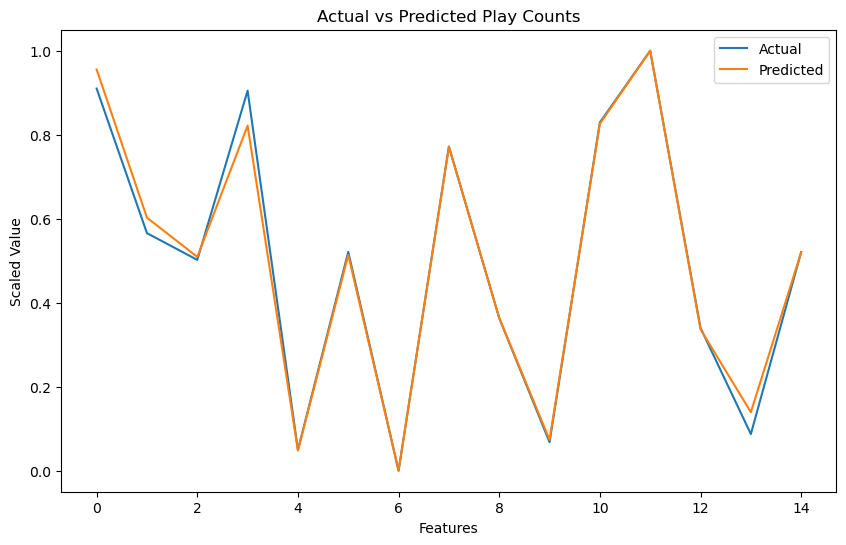

In [35]:
# Plot actual vs predicted for a sample user
sample_user_index = 0  

plt.figure(figsize=(10, 6))
plt.plot(X_test_scaled[sample_user_index], label='Actual')
plt.plot(predicted_matrix[sample_user_index], label='Predicted')
plt.title('Actual vs Predicted Play Counts')
plt.xlabel('Features')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()